In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [34]:
dataset = ps.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
dataset = dataset.iloc[:,2:]
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

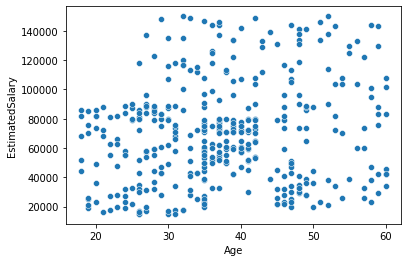

In [36]:
import seaborn as sn
sn.scatterplot(dataset.iloc[:,0],dataset.iloc[:,1])

In [37]:
x = dataset.iloc[:,0:2]
y = dataset.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x ,y,test_size = 0.2, random_state = 2)

In [39]:
import tensorflow as tw
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
traininglog = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 52ms/step - loss: 867.5997 - accuracy: 0.5406 - val_loss: 668.9530 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 429.8823 - accuracy: 0.5219 - val_loss: 456.7191 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 164.8111 - accuracy: 0.4594 - val_loss: 203.4004 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 128.6534 - accuracy: 0.5219 - val_loss: 77.7895 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 68.0912 - accuracy: 0.5719 - val_loss: 60.9820 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 51.8524 - accuracy: 0.4469 - val_loss: 62.9795 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 81.1847 - accuracy: 0.5469 - val_loss: 101.8986 - val_accurac

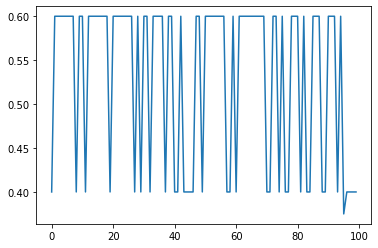

In [43]:
import matplotlib.pyplot as plt
plt.plot(traininglog.history['val_accuracy'])

In [44]:
# Applying scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [45]:
xtrainscaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

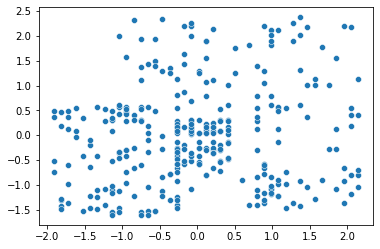

In [46]:
sn.scatterplot(xtrainscaled[:,0], xtrainscaled[:,1])

In [47]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

traininglog = model.fit(xtrainscaled, ytrain, validation_data=( xtestscaled, ytest),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6974 - accuracy: 0.5938 - val_loss: 0.6731 - val_accuracy: 0.6875
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.7563 - val_loss: 0.6149 - val_accuracy: 0.7500
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.7625 - val_loss: 0.5640 - val_accuracy: 0.7625
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7969 - val_loss: 0.5206 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5101 - accuracy: 0.8094 - val_loss: 0.4834 - val_accuracy: 0.7750
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.8094 - val_loss: 0.4507 - val_accuracy: 0.7750
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8250 - val_loss: 0.4232 - val_accuracy: 0.7875
Epoch 8/100


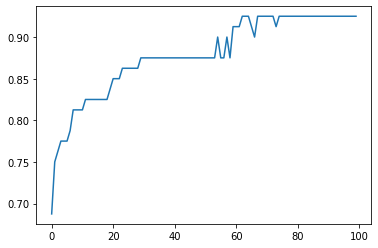

In [48]:
  import matplotlib.pyplot as plt
  plt.plot(traininglog.history['val_accuracy'])